# LAB 8 :  Write a program to implement the K-means Clustering Algorithm 

In [2]:
# import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# import dataset
dataset = pd.read_csv('South_China.csv')

In [4]:
# info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     149 non-null    int64  
 1   Renewal                149 non-null    bool   
 2   Registration_Duration  149 non-null    int64  
 3   Cost                   149 non-null    float64
 4   Revenue                149 non-null    int64  
dtypes: bool(1), float64(1), int64(3)
memory usage: 4.9 KB


In [5]:
# Dimension of dataset
dataset.shape

(149, 5)

In [6]:
X = dataset.iloc[:,[3,4]].values

In [7]:
print(X)

[[  8.33316  46.     ]
 [ 18.24564 105.     ]
 [  3.13296  55.     ]
 [  9.96705  28.     ]
 [  7.1904   32.     ]
 [  4.43194  40.     ]
 [  4.83854  40.     ]
 [  4.6224   32.     ]
 [ 10.1115  172.     ]
 [  0.95979  24.     ]
 [ 17.976    87.     ]
 [  4.42338  41.     ]
 [ 25.34188 130.     ]
 [  1.46055  37.     ]
 [  5.83471  37.     ]
 [  1.1877   16.     ]
 [  9.40744  59.     ]
 [  0.5136   33.     ]
 [  1.61356  27.     ]
 [ 11.36875 114.     ]
 [  3.2528   42.     ]
 [  3.28597  39.     ]
 [  2.80661  39.     ]
 [ 14.65793  94.     ]
 [  2.03728  51.     ]
 [  8.08064 124.     ]
 [  9.55724  53.     ]
 [  3.4775   68.     ]
 [  5.75874  42.     ]
 [  3.01098  44.     ]
 [  1.05716  20.     ]
 [  0.5136   22.     ]
 [  2.60866  21.     ]
 [  4.22864  69.     ]
 [  1.4445   47.     ]
 [  3.68508  43.     ]
 [  5.23872  44.     ]
 [ 19.95336 272.     ]
 [  5.21732  42.     ]
 [  3.20144  18.     ]
 [ 15.8895  136.     ]
 [  1.23585  37.     ]
 [  1.33536  25.     ]
 [  5.0932 

### Using the elbow method to find the optimal number of clusters

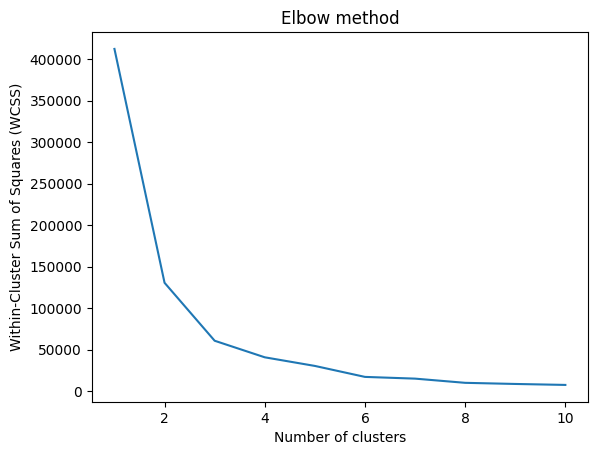

In [8]:
from sklearn.cluster import KMeans

# List to store the Within-Cluster Sum of Squares (WCSS) for each number of clusters
wcss = []

# Loop through different numbers of clusters from 1 to 10
for i in range(1, 11):
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=50)
    
    # Fit the KMeans model to the data
    kmeans.fit(X)
    
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)

# Adding title and labels
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")

# Display the plot
plt.show()

## Training the K-Means model on the dataset

In [9]:
# Initializing KMeans with the desired number of clusters, initialization method, and random state
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=50)

# Fitting KMeans to the data
kmeans.fit(X)

KMeans(n_clusters=3, random_state=50)

## Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit()

In [10]:
# The lowest SSE value
kmeans.inertia_

60884.790425589985

In [11]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[  4.43454641,  38.27350427],
       [ 11.49671407, 120.88888889],
       [ 23.204876  , 256.8       ]])

In [12]:
# The number of iterations required to converge
kmeans.n_iter_

4

In [13]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1])

## Creating Output labels for Generating Graph

In [14]:
y_kmeans = kmeans.fit_predict(X)

In [15]:
print(y_kmeans)

[0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 1 0 1 1 2 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0 0 1 2 0 0 0 0
 1]


## Visualising the clusters

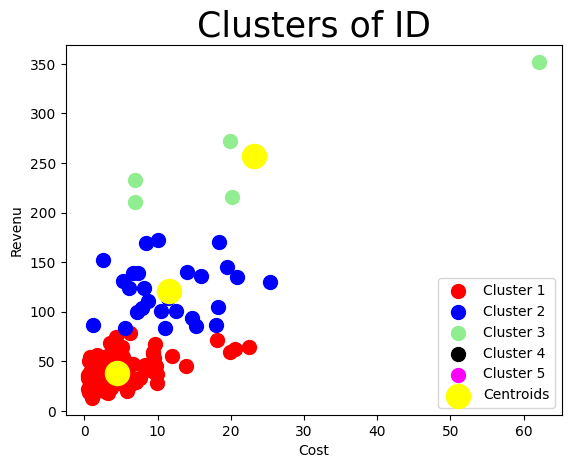

In [18]:
# Plotting the data points for Cluster 1
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c='red', label="Cluster 1")

# Plotting the data points for Cluster 2
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c='blue', label="Cluster 2")

# Plotting the data points for Cluster 3
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c='lightgreen', label="Cluster 3")

# Plotting the data points for Cluster 4
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c='black', label="Cluster 4")

# Plotting the data points for Cluster 5
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c='magenta', label="Cluster 5")

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c='yellow', label='Centroids')

# Adding title and labels
plt.title("Clusters of ID", size = 25)
plt.xlabel("Cost")
plt.ylabel("Revenu")

# Adding legend
plt.legend()

# Displaying the plot
plt.show()